In [3]:
import os

import pandas as pd
import numpy as np


In [4]:
dir = "/home/chenghao/data_tooling/ac_dc/deduplicate/outputs/en"

### Substrings

In [5]:
total_size = os.path.getsize(os.path.join(dir, "text.csv"))
total_size

982249623332

In [6]:
substr = pd.read_csv(os.path.join(dir, "substring_bytes.tsv"), sep='\t')

In [7]:
substr.head()

,id,x,y
0,40,49,1818
1,40,8898,9183
2,40,10034,10161
3,40,13228,13728
4,40,14458,14852


In [8]:
duplicated = sum(substr.y - substr.x)

duplicated, duplicated / total_size

(200379191637, 0.20400027332896406)

In [5]:
matches = pd.read_csv(os.path.join(dir, "matches.tsv"), sep='\t')
clusters = pd.read_csv(os.path.join(dir, "clusters.tsv"), sep='\t')

In [6]:
matches.head()

,id1,id2,diff
0,5676323,8347653,4
1,20899,10053778,4
2,8489615,104312,4
3,5954463,8302303,4
4,5954463,6976392,4


In [7]:
clusters.head()

,id,hash,cluster
0,0,2471784231621897202,-1
1,1,16314724221857303546,-1
2,4,10666012509495373957,-1
3,5,11268168968368626344,-1
4,6,13611218298219610011,-1


In [31]:
ids = pd.read_csv(os.path.join(dir, "ids.csv"), names=["id"])
text = pd.read_csv(os.path.join(dir, "text.csv"), names=["text"])

print(len(ids), len(text))

8051306 8051306


In [38]:
text.head()

,text
0,أعلنت إيران، اليوم الإثنين، وفاة عضو مجلس خبرا...
1,وكانت منظمة الصحة العالمية صنفت فيرس كورونا «و...
2,الرئيسية ⁄ إبداع ⁄ قصيدة: شَهَقاتٌ “مَرْثِيَةُ...
3,بانضباط ودبلوماسية عالية هندس رئيس مجلس الأعيا...
4,ترتيب الأمور وضبطها في مجلس الأعيان لا تقابله ...


In [33]:
clusters = clusters[clusters.cluster != -1]

### Cluster size distribution

<AxesSubplot:xlabel='size'>

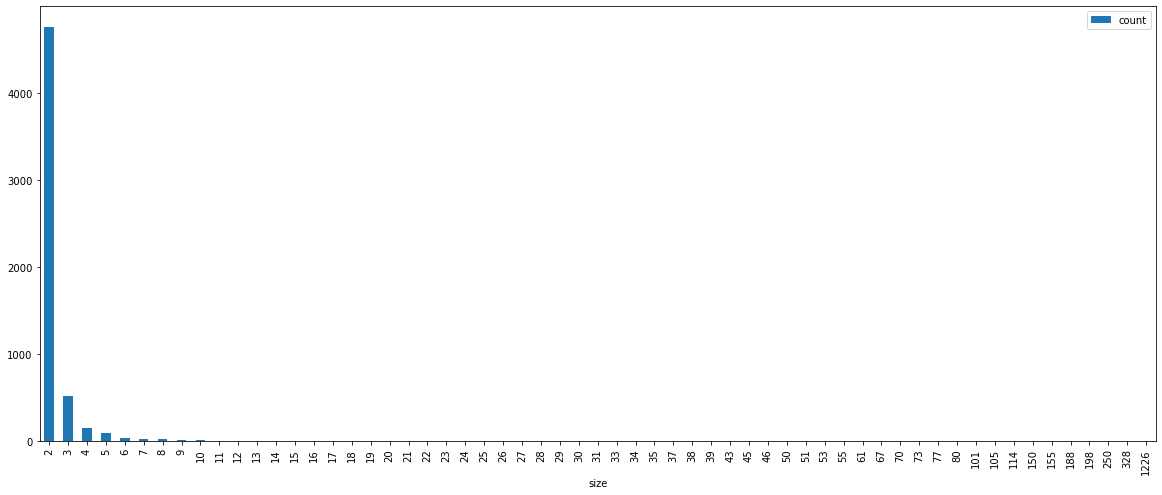

In [34]:
sizes = clusters.groupby("cluster").size().value_counts().sort_index()
sizes = sizes.to_frame()
sizes.reset_index(inplace=True)
sizes = sizes.rename({"index": "size", 0: "count"}, axis=1)
sizes.plot.bar(x="size", y="count", figsize=(20, 8))

### Document length distribution

In [39]:
ids = ids.assign(
    length = text.apply(lambda x: len(x["text"]), axis=1)
)

In [45]:
id2length = dict(ids[["id", "length"]].values.tolist())

In [73]:

matches["length"] = matches.apply(lambda x: max(
    id2length[x["id1"]],
    id2length[x["id2"]],
), axis=1)


[(0.0, 200000.0)]

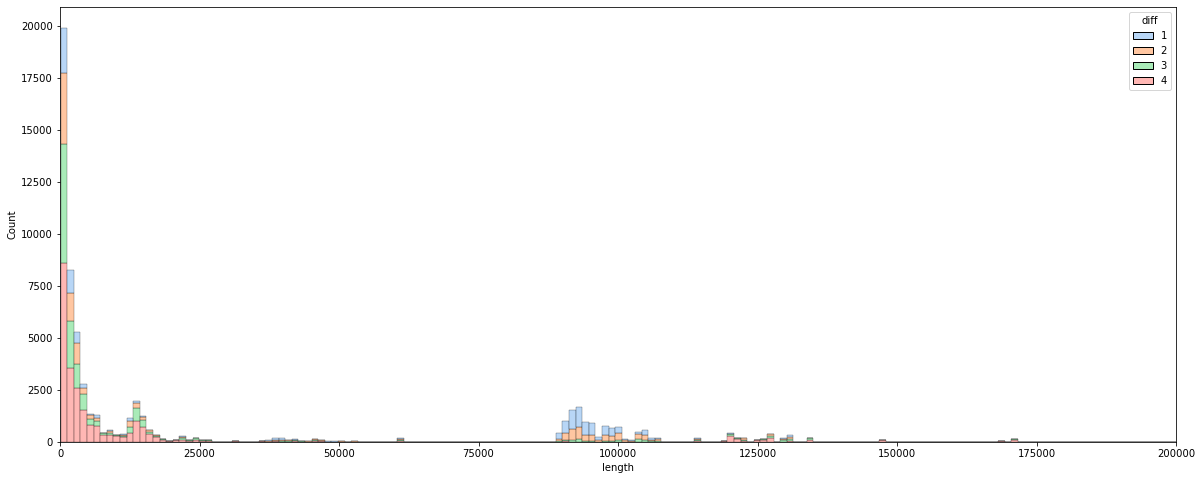

In [93]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20, 8))

g = sns.histplot(data=matches, stat="count", multiple="stack",
             x="length", kde=False,
             palette="pastel", hue="diff",
             element="bars", legend=True)

g.set(xlim=(0, 200000))

<AxesSubplot:ylabel='Frequency'>

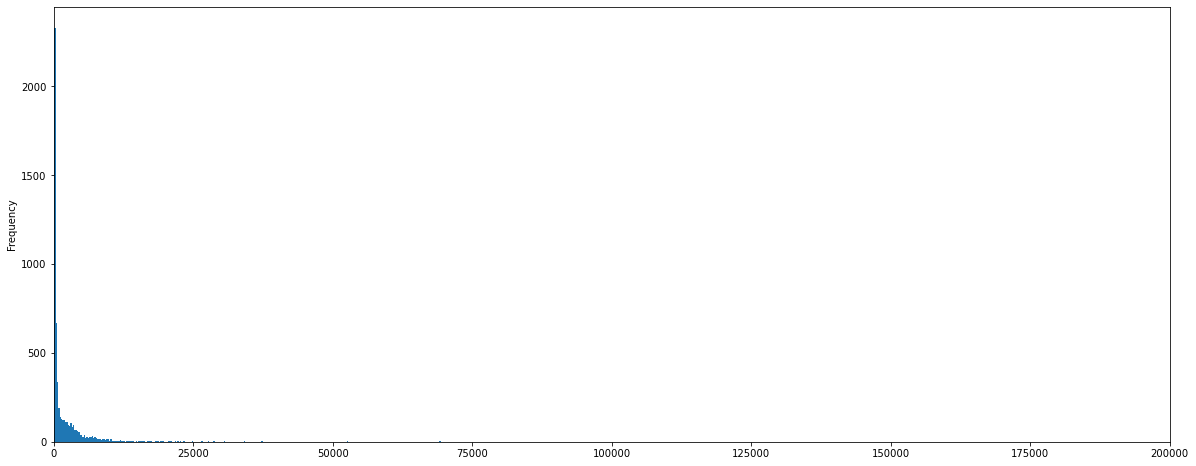

In [95]:
clusters.groupby("cluster").apply(lambda x: np.max([id2length[r["id"]] for r in x.to_dict("records")])).plot.hist(bins=2000, figsize=(20, 8), xlim=(0, 200000))